In [25]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
filename = "/home/clevyfidel/clevyfidel/Workspace/goin/opt_coin/comparison_results_medium.pkl"

with open(filename, 'rb') as f:
    data = pickle.load(f)

In [23]:
data # As a reminder, "small" ran with 2 samples, 5 timepoints, for each of the 8 configs

{0: {'gamma_t': np.float64(0.1),
  'alpha_t': np.float64(0.1),
  'rho_t': np.float64(0.1),
  'Python': {'time': 0.02202910582224528,
   'logp_y_avg': array([-0.11117258,  0.27241845,  0.31925223,  0.24650824,  0.27320468,
           0.4060845 ,  0.232521  , -0.7212789 ,  0.22207178,  0.19384503]),
   'logp_y_sum': array([-0.55586292,  1.36209224,  1.59626113,  1.23254118,  1.36602339,
           2.03042251,  1.162605  , -3.60639452,  1.1103589 ,  0.96922515]),
   'logp_c_avg': array([-0.00296957, -0.00306208, -0.00290284, -0.02504182, -0.00302658,
          -0.00306156, -0.00472078, -0.00285896, -0.0039694 , -0.00310654]),
   'logp_c_sum': array([-0.01484784, -0.01531041, -0.01451422, -0.12520912, -0.01513291,
          -0.01530778, -0.02360389, -0.01429481, -0.01984699, -0.01553269])},
  'Leaky': {'time': 0.059491173426310225,
   'logp_y_avg': array([-1.33816304, -0.32763464, -0.32312034,  0.04787219, -0.31263547,
           0.25936769, -0.19854813, -0.46604113, -0.63156696, -0.818774

In [4]:
data.keys()# here 8, will be 27 

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])

In [32]:
data[1]

{'gamma_t': np.float64(10.0),
 'alpha_t': np.float64(0.1),
 'rho_t': np.float64(0.1),
 'Python': {'time': 0.022296122709910073,
  'logp_y_avg': array([-0.60252852, -0.0638345 ,  0.061008  , -0.36404631, -1.62365029,
          0.37798792,  0.40819604, -1.1853549 ,  0.4203419 , -0.21476172]),
  'logp_y_sum': array([-3.0126426 , -0.3191725 ,  0.30504002, -1.82023153, -8.11825144,
          1.88993958,  2.04098019, -5.92677449,  2.10170949, -1.07380858]),
  'logp_c_avg': array([-0.07652154, -0.06105727, -0.04847866, -0.04550559, -1.18165394,
         -0.03926827, -0.05174587, -1.09554917, -0.04196669, -0.0385757 ]),
  'logp_c_sum': array([-0.38260768, -0.30528634, -0.24239328, -0.22752797, -5.9082697 ,
         -0.19634137, -0.25872934, -5.47774587, -0.20983344, -0.19287849])},
 'Leaky': {'time': 0.08076413869857788,
  'logp_y_avg': array([-0.80150934, -0.30350583,  0.05476314, -1.15061415, -1.46770419,
         -0.10458498, -0.43413024, -7.06298921,  0.127013  , -1.07793587]),
  'logp_y_s

In [39]:
df_logpy = []
df_logpc = [] 
df_time = [] 

for id_config in data.keys():
    df_logpy_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['logp_y_avg'],
                               'matlab': data[id_config]['Matlab']['logp_y_avg'],
                               'leaky': data[id_config]['Leaky']['logp_y_avg']})
    df_logpy.append(df_logpy_partial)
    
    # df_time_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['time'],
    #                            'matlab': data[id_config]['Matlab']['time'],
    #                            'leaky': data[id_config]['Leaky']['time']})
    
    df_logpc_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['logp_c_avg'],
                               'matlab': data[id_config]['Matlab']['logp_c_avg'],
                               'leaky': data[id_config]['Leaky']['logp_c_avg']})
    df_logpc.append(df_logpc_partial)

df_logpy = pd.concat(df_logpy, ignore_index=True)
df_logpc = pd.concat(df_logpc, ignore_index=True)


In [41]:
df_logpy.describe()

,python,matlab,leaky
count,80.000000,80.000000,80.000000
mean,-0.372568,1.833158,-8.683798
std,1.183054,0.573521,28.698724
min,-8.034982,-0.042294,-186.435622
25%,-0.709339,1.666897,-3.435135
50%,0.011478,2.052920,-0.929419
75%,0.306910,2.244573,-0.107458
max,0.588495,2.412922,0.848001


In [42]:
df_logpc.describe()

/home/clevyfidel/.conda/envs/coin/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/clevyfidel/.conda/envs/coin/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/clevyfidel/.conda/envs/coin/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/clevyfidel/.conda/envs/coin/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,python,matlab,leaky
count,80.000000,80.000000,80.0
mean,-inf,-inf,-inf
std,NaN,NaN,NaN
min,-inf,-inf,-inf
25%,-0.505468,-0.410312,NaN
50%,-0.029194,-0.035763,0.0
75%,-0.006336,-0.007267,0.0
max,-0.002339,-0.001981,0.0


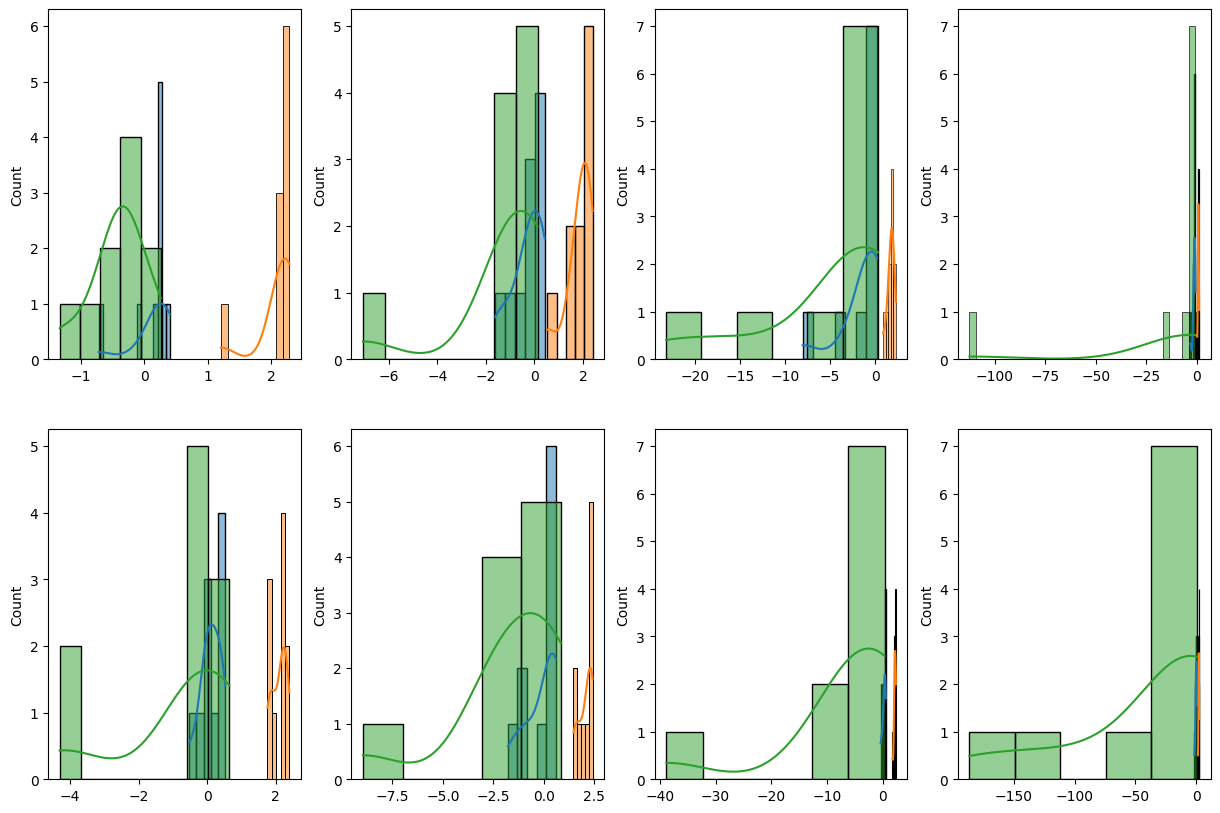

In [31]:
# Logp y (observations)
krows = 2
fig, axs = plt.subplots(krows, len(data.keys())//krows, figsize=(15, 10))
for i in range(len(data.keys())):
    sns.histplot(data=data[i]['Python']['logp_y_avg'], ax=axs.flatten()[i], kde=True)
    sns.histplot(data=data[i]['Matlab']['logp_y_avg'], ax=axs.flatten()[i], kde=True)
    sns.histplot(data=data[i]['Leaky']['logp_y_avg'], ax=axs.flatten()[i], kde=True)
    # axs.flatten()[i].hist(data[i]['Python']['logp_y_avg'])
    # axs.flatten()[i].hist(data[i]['Matlab']['logp_y_avg'])
    # axs.flatten()[i].hist(data[i]['Leaky']['logp_y_avg'])

In [ ]:
# Logp c (context)